## 1 - Introduction
This notebook is for clean the dataset downloaded from Lending Club website.

## 2 - Dataset

The dataset was download from [Lending Club](https://www.lendingclub.com/statistics/additional-statistics?). It contains information from 2015 to 2019. 

**Data manipulation**: 

    - Concatenate data from 2015 to 2019
    - Remove columns with >20% missing values
    - Save to a new csv file



In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# read data
path = '/Users/cyuancheng/Documents/course/Springboard/Capstone1/data/'
data = pd.read_csv(path+'data_2015_2019.csv',low_memory=True)

In [3]:
data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,...,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,year
0,68367011,21000.0,21000.0,21000.0,60 months,13.99%,488.53,C,C4,Resident physician,< 1 year,RENT,52000.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,441xx,OH,14.47,0.0,Jan-2005,...,0.0,3.0,3.0,4.0,4.0,11.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,1.0,100.0,75.0,0.0,0.0,370357.0,372407.0,23300.0,347057.0,N,N,2015
1,68537655,16800.0,16800.0,16800.0,60 months,12.88%,381.23,C,C2,CEO,10+ years,MORTGAGE,118000.0,Not Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,636xx,MO,34.29,0.0,Jun-1997,...,12.0,3.0,3.0,4.0,22.0,12.0,5.0,28.0,3.0,11.0,0.0,0.0,0.0,1.0,64.4,25.0,0.0,0.0,412771.0,75808.0,12600.0,115941.0,N,N,2015
2,68356421,22400.0,22400.0,22400.0,60 months,12.88%,508.30,C,C2,Executive Director,6 years,MORTGAGE,95000.0,Not Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,290xx,SC,22.98,0.0,Apr-1995,...,2.0,3.0,8.0,4.0,5.0,15.0,10.0,15.0,8.0,16.0,0.0,0.0,0.0,3.0,97.0,25.0,0.0,0.0,436841.0,184356.0,21000.0,191682.0,N,N,2015
3,68466926,10000.0,10000.0,10000.0,36 months,6.49%,306.45,A,A2,SERVICE MANAGER,6 years,RENT,85000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,160xx,PA,13.07,0.0,Apr-2002,...,0.0,6.0,9.0,7.0,10.0,3.0,13.0,19.0,9.0,14.0,0.0,0.0,0.0,2.0,95.7,28.6,1.0,0.0,61099.0,27957.0,16400.0,30799.0,N,N,2015
4,68616873,8000.0,8000.0,8000.0,36 months,11.48%,263.74,B,B5,Vendor liaison,10+ years,MORTGAGE,42000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,029xx,RI,34.80,0.0,Nov-1994,...,1.0,3.0,3.0,3.0,6.0,5.0,5.0,11.0,3.0,8.0,0.0,0.0,0.0,2.0,94.4,33.3,0.0,0.0,256513.0,113782.0,17000.0,135513.0,N,N,2015


In [4]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312464 entries, 0 to 2312463
Data columns (total 106 columns):
id                            object
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                          object
int_rate                      object
installment                   float64
grade                         object
sub_grade                     object
emp_title                     object
emp_length                    object
home_ownership                object
annual_inc                    float64
verification_status           object
issue_d                       object
loan_status                   object
pymnt_plan                    object
url                           object
purpose                       object
title                         object
zip_code                      object
addr_state                    object
dti                           float64
delinq_2yrs                  

In [5]:
# check columns
print(sorted(data.columns))

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'id', 'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_t

Identify the columns we'll be keeping from the original dataset

In [6]:
col_pick = ['id','loan_amnt','funded_amnt','term','int_rate',
                 'installment','grade','emp_length', 'home_ownership',
                 'annual_inc','verification_status','issue_d',
                 'loan_status','purpose','dti', 'delinq_2yrs',
                 'earliest_cr_line','open_acc','pub_rec', 'fico_range_high',
                 'fico_range_low', 'revol_bal','revol_util', 'total_pymnt',
                                                    'last_pymnt_d', 'recoveries']

In [7]:
len(col_pick)

26

Identify the data type of these columns

In [8]:
col_float = ['loan_amnt', 'funded_amnt', 'installment', 'annual_inc',
                     'dti', 'revol_bal', 'delinq_2yrs', 'open_acc', 'pub_rec',
                                'fico_range_high', 'fico_range_low', 'total_pymnt', 'recoveries']
col_cat = ['term', 'grade', 'emp_length', 'home_ownership',
                    'verification_status', 'loan_status', 'purpose']
col_perc = ['int_rate', 'revol_util']
col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d']

In [9]:
assert set(col_pick) - set(col_float) - set(col_cat) - set(col_perc) - set(col_date) \
== set(["id"])

### Prepare dataset

In [100]:
df = data[col_pick].copy()

In [101]:
print("Dataset has " + str(df.shape[0]) + " rows" +' and ' + str(df.shape[1]) + ' columns')

Dataset has 2312464 rows and 26 columns


### Target

In [102]:
df['loan_status'].value_counts(dropna=False)

Current               1018979
Fully Paid             995328
Charged Off            259485
Late (31-120 days)      22853
In Grace Period         10848
Late (16-30 days)        4683
Issued                    206
Default                    48
NaN                        34
Name: loan_status, dtype: int64

In [103]:
df = df.loc[df['loan_status'].isin(["Fully Paid", "Charged Off"])]

In [104]:
df.shape

(1254813, 26)

In [105]:
# check missing value
df['loan_status'].isnull().sum()

0

In [107]:
df['loan_status'].value_counts(normalize=True)

Fully Paid     0.793208
Charged Off    0.206792
Name: loan_status, dtype: float64

Tag the 'Fully Paid' to 0; 'Charged Off' to 1

In [109]:
# fully paid: 0, charged off:1
df['labels'] = df['loan_status'].apply(lambda x:0 if x=='Fully Paid' else 1)
df['labels'].value_counts(normalize=True) 

0    0.793208
1    0.206792
Name: labels, dtype: float64

#### work on datetime date

In [110]:
df[col_date].head()

,issue_d,earliest_cr_line,last_pymnt_d
0,Dec-2015,Jan-2005,Aug-2018
3,Dec-2015,Apr-2002,Aug-2018
4,Dec-2015,Nov-1994,Apr-2017
5,Dec-2015,Feb-1999,Jan-2017
6,Dec-2015,May-1984,May-2017


In [111]:
df[col_date].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254813 entries, 0 to 2312457
Data columns (total 3 columns):
issue_d             1254813 non-null object
earliest_cr_line    1254813 non-null object
last_pymnt_d        1252139 non-null object
dtypes: object(3)
memory usage: 38.3+ MB


In [112]:
# check missing value
df[col_date].isnull().sum()

issue_d                0
earliest_cr_line       0
last_pymnt_d        2674
dtype: int64

In [113]:
# drop nan from last_pymnt_d column
df.dropna(subset=['last_pymnt_d'], inplace=True)

In [114]:
df[col_date].isnull().sum()

issue_d             0
earliest_cr_line    0
last_pymnt_d        0
dtype: int64

In [115]:
# convert to correct datetime formate
for col in col_date:
    df[col]=df[col].apply(lambda x: datetime.strptime(x,'%b-%Y'))

In [116]:
df[col_date].head()

,issue_d,earliest_cr_line,last_pymnt_d
0,2015-12-01,2005-01-01,2018-08-01
3,2015-12-01,2002-04-01,2018-08-01
4,2015-12-01,1994-11-01,2017-04-01
5,2015-12-01,1999-02-01,2017-01-01
6,2015-12-01,1984-05-01,2017-05-01


In [129]:
df[col_date].describe()

,issue_d,earliest_cr_line,last_pymnt_d
count,1238903,1238903,1238903
unique,60,742,61
top,2016-03-01 00:00:00,2004-09-01 00:00:00,2019-04-01 00:00:00
freq,56490,9181,39528
first,2015-01-01 00:00:00,1933-03-01 00:00:00,2015-02-01 00:00:00
last,2019-12-01 00:00:00,2016-10-01 00:00:00,2020-02-01 00:00:00


#### calculate loan period

In [119]:
df['loan_period'] = (df['last_pymnt_d'] - df['issue_d'])/ np.timedelta64(1, 'M')

In [120]:
# remove loan_period = 0
df = df[df['loan_period']!=0]

Text(0, 0.5, 'frequency')

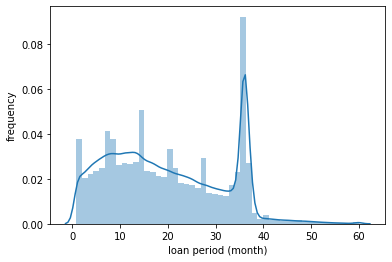

In [121]:
sns.distplot(df['loan_period'])
plt.xlabel('loan period (month)')
plt.ylabel('frequency')

#### work on percentage column

In [122]:
df[col_perc].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239812 entries, 0 to 2312457
Data columns (total 2 columns):
int_rate      1239812 non-null object
revol_util    1238903 non-null object
dtypes: object(2)
memory usage: 28.4+ MB


In [123]:
df[col_perc].isnull().sum()

int_rate        0
revol_util    909
dtype: int64

In [124]:
# drop nan from revol_util column
df.dropna(subset=['revol_util'], inplace=True)

In [125]:
df[col_perc].isnull().sum()

int_rate      0
revol_util    0
dtype: int64

In [126]:
for col in col_perc:
    df[col] = df[col].apply(lambda x: x.strip('%'))
    df[col] = df[col].apply(lambda x: pd.to_numeric(x))

In [127]:
df[col_perc].head()

,int_rate,revol_util
0,13.99,87.4
3,6.49,34.5
4,11.48,39.1
5,8.49,5.7
6,6.49,64.5


In [130]:
df[col_perc].describe()

,int_rate,revol_util
count,1.238903e+06,1.238903e+06
mean,1.293648e+01,4.893088e+01
std,4.934891e+00,2.476853e+01
min,5.310000e+00,0.000000e+00
25%,9.170000e+00,3.000000e+01
50%,1.229000e+01,4.850000e+01
75%,1.561000e+01,6.780000e+01
max,3.099000e+01,1.930000e+02


### Deal with outliner and missing values for each column

In [131]:
df.shape

(1238903, 28)

In [132]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'fico_range_high', 'fico_range_low', 'revol_bal', 'revol_util',
       'total_pymnt', 'last_pymnt_d', 'recoveries', 'labels', 'loan_period'],
      dtype='object')

In [145]:
ls_fp = df.loc[df['loan_status'] == 'Fully Paid']
ls_co = df.loc[df['loan_status'] == 'Charged Off']

In [182]:
# make general plots to examine each feature
def plot_num(col_name, full_name):
    """
    Visualize a variable with/without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    """

    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,5))
    # plot1: counts distribution of the variable
    #sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    sns.distplot(df[col_name], kde=True,ax=ax1)
    sns.distplot(ls_fp[col_name], hist=False, rug=False, label = 'Fully Paid', ax=ax1)
    sns.distplot(ls_co[col_name], hist=False, rug=False, label = 'Charged Off', ax=ax1)
    
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)
    #plt.show()
          
    # plot2: box plot of the variable grouped by loan_status
    sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_title(full_name)
  
    plt.tight_layout()

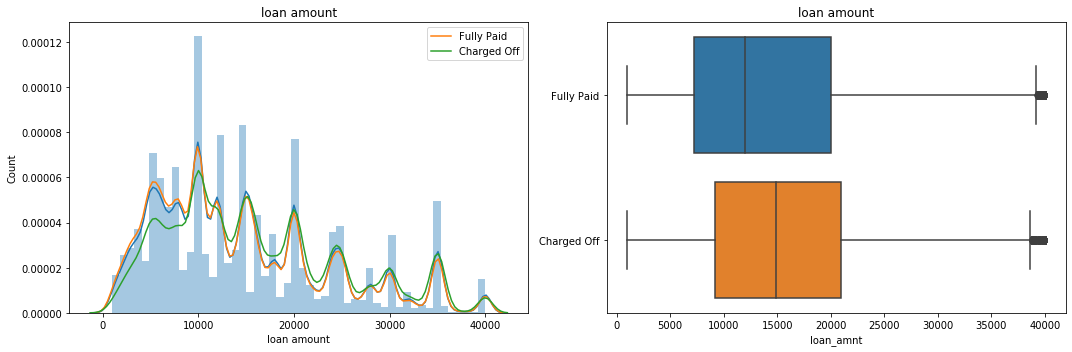

In [183]:
plot_num('loan_amnt', 'loan amount')

#### id
Data Dictionary: "A unique [LendingClub] assigned ID for the loan listing."

In [135]:
df['id'].describe()

count       1238903
unique      1238903
top       148926520
freq              1
Name: id, dtype: int64

Each id is unique. Since id does not useful for modeling, we can drop this column

In [136]:
df.drop('id', axis=1, inplace=True)

#### 'loan_amnt'

In [137]:
df['loan_amnt'].describe()

count    1.238903e+06
mean     1.461006e+04
std      9.097611e+03
min      1.000000e+03
25%      7.575000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

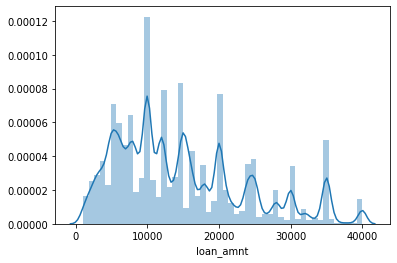

In [138]:
sns.distplot(df['loan_amnt'])